# Stats 101C Homework #3

## Damien Ha

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('smoke_detection_iot.csv')

### #1

In [3]:
# Normalize each column
X = df.iloc[:, :-1].values
X = StandardScaler().fit_transform(X)

### #2

In [4]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['Fire Alarm'].values, test_size=0.3, random_state=42)

### #3

/Users/dha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LDA: 91.66%
Accuracy of Logistic Regression: 98.72%


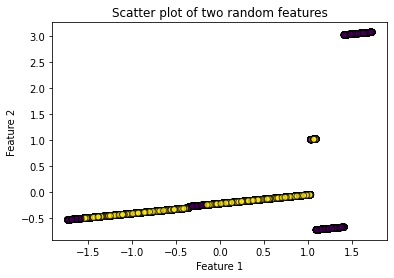

In [5]:
# Train LDA and logistic classifiers
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate on the testing dataset
y_pred_lda = lda.predict(X_test)
y_pred_logreg = logreg.predict(X_test)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Accuracy of LDA: {:.2f}%".format(accuracy_lda * 100))
print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy_logreg * 100))

# Scatter plot for LDA assumption
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o', alpha=0.7)
plt.title("Scatter plot of two random features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Logistic regression has a higher accuracy than LDA with 7.06% higher accuracy

### #4

In [6]:
# Fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate on the testing dataset
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN: {:.2f}%".format(accuracy_knn * 100))

# Compare the classifiers
print("\nComparison:")
print("1. LDA vs. Logistic Regression:")
print("   - LDA Accuracy: {:.2f}%".format(accuracy_lda * 100))
print("   - Logistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))
print("2. KNN vs. LDA and Logistic Regression:")
print("   - KNN Accuracy: {:.2f}%".format(accuracy_knn * 100))

Accuracy of KNN: 99.99%

Comparison:
1. LDA vs. Logistic Regression:
   - LDA Accuracy: 91.66%
   - Logistic Regression Accuracy: 98.72%
2. KNN vs. LDA and Logistic Regression:
   - KNN Accuracy: 99.99%


KNN has a higher accuracy than both LDA and logistic regression